-916721.3127111453


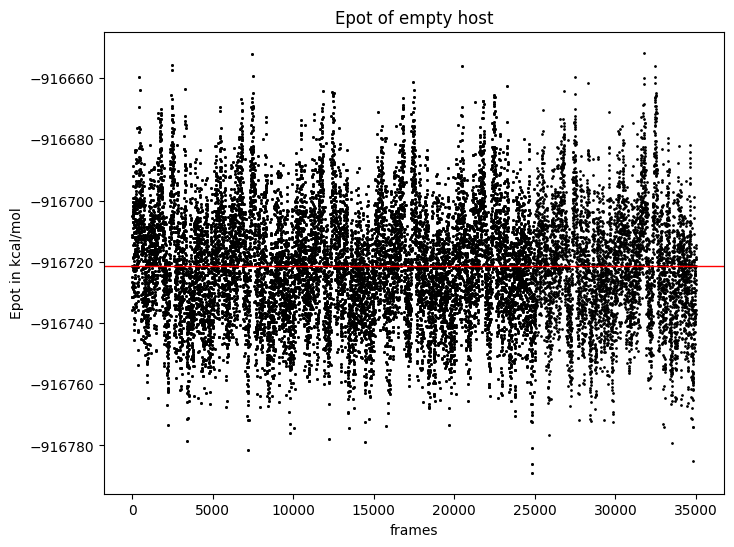

553.312513599857


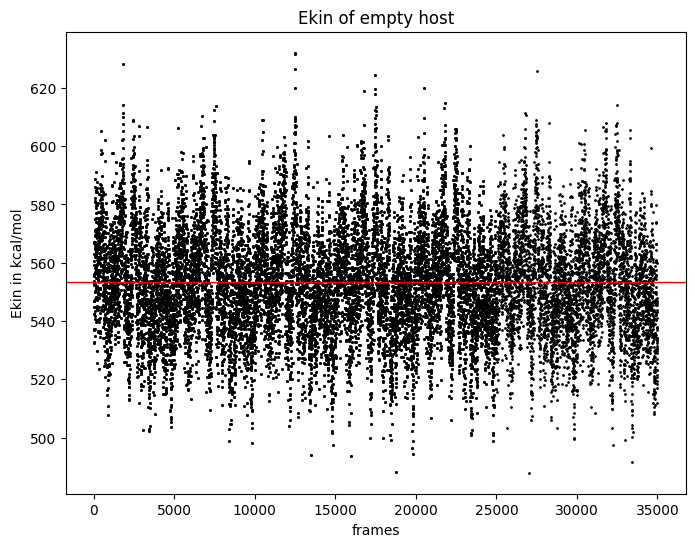

-916168.0001975455


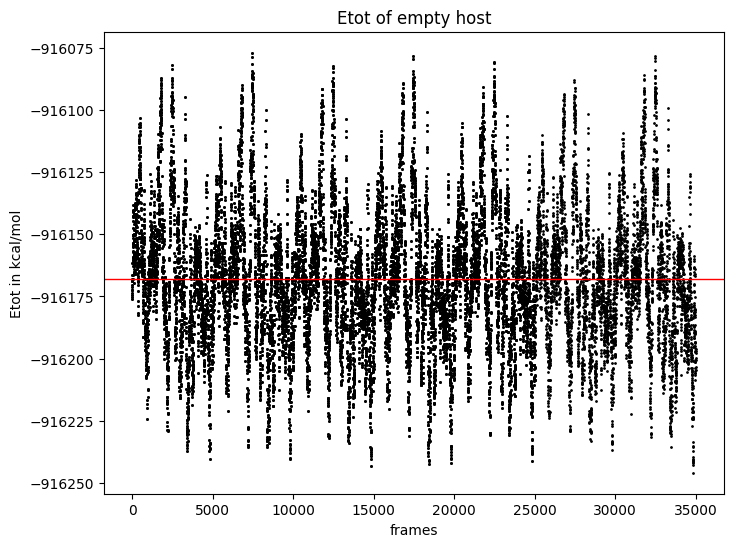

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import math

# Directory containing the .en files for empty host 
directory = '/home/mfi/Desktop/mfi/MIL-68Ga-michael'

# List of dataframes
dfs = []

#Loop through energy files
for filename in os.listdir(directory):
    if filename.endswith('.en'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, delimiter='\s+', header=None)
        df['run'] = filename
        dfs.append(df)

#Concat dataframes
merged_df = pd.concat(dfs, axis=0, ignore_index=True)

# Check if there are at least 2 columns in the merged DataFrame
if len(merged_df.columns) >= 2:

    # Calculate the average of column 5
    column_5_average = merged_df.iloc[:, 4].mean()
    print(column_5_average)

    # Plot the second column (index 1) against the first column (index 0)
    plt.figure(figsize=(8, 6))
    plt.scatter(merged_df.iloc[:, 0], merged_df.iloc[:, 4], s=1, marker='o', color='k')

    # Plot the average of column 5
    plt.axhline(y=column_5_average, color='r', linestyle='-', linewidth=1, label=f'Avg: {column_5_average:.2f}')

    plt.xlabel('frames')
    plt.ylabel('Epot in kcal/mol')
    plt.title('Epot of empty host')
    plt.grid(False)
    plt.show()



    # Calculate the average of column 7
    column_7_average = merged_df.iloc[:, 6].mean()
    print(column_7_average)

    # Plot the second column (index 1) against the first column (index 0)
    plt.figure(figsize=(8, 6))
    plt.scatter(merged_df.iloc[:, 0], merged_df.iloc[:, 6], s=1, marker='o', color='k')

    # Plot the average of column 7
    plt.axhline(y=column_7_average, color='r', linestyle='-', linewidth=1, label=f'Avg: {column_7_average:.2f}')

    plt.xlabel('frames')
    plt.ylabel('Ekin in kcal/mol')
    plt.title('Ekin of empty host')
    plt.grid(False)
    plt.show()


    # Calculate the total energy
    total_energy = merged_df.iloc[:, 4] + merged_df.iloc[:, 6]

    # Calculate the total energy average
    total_energy_average = total_energy.mean()
    print(total_energy_average)

    # Plot the total energy
    plt.figure(figsize=(8, 6))
    plt.scatter(merged_df.iloc[:, 0], total_energy, s=1, marker='o', color='k')

    # Plot the average of column 7
    plt.axhline(y=total_energy_average, color='r', linestyle='-', linewidth=1, label=f'Avg: {total_energy_average:.2f}')

    plt.xlabel('frames')
    plt.ylabel('Etot in kcal/mol')
    plt.title('Etot of empty host')
    plt.grid(False)
    plt.show()

else:
    print('The input files should have at least 2 columns for plotting.')


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Directory containing the .en files for empty host 
directory = '/home/praktikum/mfi/MIL-68Ga-guest'

# List of dataframes
dfs = []

#Loop through xyz files
for filename in os.listdir(directory):
    if filename.endswith('.xyz') and filename.startswith('MIL68Ga-guest'):
        print(filename)
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, delimiter='\s+', header=None)
        df['run'] = filename
        print(df[0][1])
        print(df)
        dfs.append(df)



MIL68Ga-guest-03.xyz
X
          0          1          2          3     4     5     6   
0       721  21.833101  37.486334  20.121965  90.0  90.0  90.0  \
1         X  10.288400  -0.116800  -3.467300   NaN   NaN   NaN   
2        Ga  10.288400  -0.116800  -3.467300   NaN   NaN   NaN   
3        Ga -10.624200  -0.166800  -6.743700   NaN   NaN   NaN   
4        Ga   0.376400 -18.707900  -3.168100   NaN   NaN   NaN   
...     ...        ...        ...        ...   ...   ...   ...   
184105    H  -1.584300  -5.482100   3.391700   NaN   NaN   NaN   
184106    C  -3.645000  -5.959200   3.796400   NaN   NaN   NaN   
184107    H  -3.925900  -4.921100   3.975900   NaN   NaN   NaN   
184108    H  -4.421000  -6.625400   3.418400   NaN   NaN   NaN   
184109    H  -3.332200  -6.304000   4.782300   NaN   NaN   NaN   

                         run  
0       MIL68Ga-guest-03.xyz  
1       MIL68Ga-guest-03.xyz  
2       MIL68Ga-guest-03.xyz  
3       MIL68Ga-guest-03.xyz  
4       MIL68Ga-guest-03.xyz 

In [2]:
#Defining function to plot centroid distances over the course of the simulation

import matplotlib.pyplot as plt
import pandas as pd
import os
import math

# Directory containing the .xyz files to analyze 
directory = '/home/mfi/Desktop/mfi/MIL-68Ga-guest'

# List of dataframes
dfs = []

# Save lattice parameters in seperate dataframe
latticefilename = 'MIL68Ga-guest-02.xyz'
lattice = pd.read_csv(os.path.join(directory,latticefilename), delimiter='\s+', header=None, skiprows=range(2,400000), nrows=1)
numAtoms = lattice[0][0]-1
print(numAtoms)

# Save indices of carbons of which to form centroids
indexfilename = "indicessorted.dat"
centroid_indices = pd.read_csv(os.path.join(directory, indexfilename), delimiter = " ", header = None)
#print(centroid_indices)
numOfCentroides  = centroid_indices.index.size
#print(numOfCentroides)


720


In [4]:
#Loop through xyz files
for filename in sorted(os.listdir(directory)):
    if filename.endswith('.xyz') and filename.startswith('MIL68Ga-guest'):
        #print(filename)
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, delimiter='\s+', header=None, skiprows=1)
        df['run'] = filename
        #print(df[0][1])
        # df['cleanedIndex'] = (df.index)%(numAtoms)
        #drop all rows not containing coordinates
        df = df[~df.iloc[:,1].isna()]
        #drop all rows that are an X element
        df = df[df[0] != 'X']
        df.reset_index(drop=True, inplace=True)
        #add cleanedIndex to each row representing its index in the simulation, going from 1 to numAtoms. Number rows from 1 to numAtoms, then start at 1 again
        df['cleanedIndex'] = (df.index)%(numAtoms)+1
        #df['runningIndex'] = ((df.index)//(numAtoms+1)+1).astype(int)
        print(df)
        dfs.append(df)
        

#Concat dataframes
merged_df = pd.concat(dfs, axis=0, ignore_index=True)

          0        1        2       3                   run  cleanedIndex
0        Ga  10.8656  -0.0717 -3.5586  MIL68Ga-guest-01.xyz             1
1        Ga  10.2688  -0.1293 -7.0245  MIL68Ga-guest-01.xyz             2
2        Ga  -0.3134  18.6673 -3.2842  MIL68Ga-guest-01.xyz             3
3        Ga   0.2141 -18.5028 -6.6460  MIL68Ga-guest-01.xyz             4
4        Ga  -4.4561   9.2758 -3.7500  MIL68Ga-guest-01.xyz             5
...      ..      ...      ...     ...                   ...           ...
1799995   H  -0.6494  -6.0928  3.9265  MIL68Ga-guest-01.xyz           716
1799996   C  -2.5494  -5.5943  4.7929  MIL68Ga-guest-01.xyz           717
1799997   H  -1.9637  -4.8087  5.2712  MIL68Ga-guest-01.xyz           718
1799998   H  -3.5062  -5.1469  4.5226  MIL68Ga-guest-01.xyz           719
1799999   H  -2.6228  -6.4228  5.4978  MIL68Ga-guest-01.xyz           720

[1800000 rows x 6 columns]
          0        1        2       3                   run  cleanedIndex
0        G

In [24]:
#Add new index collecting assigning each row to its respective step in the simulation
merged_df['runningIndex'] = ((merged_df.index)//(numAtoms+1)+1).astype(int)

In [26]:
#Find max value of runningIndex column, i.e. number of steps performed in total
numSteps = merged_df['runningIndex'].max()
print(numSteps)

307500


In [5]:
print(centroid_indices.loc[0,:])
for i in centroid_indices.loc[0,:]:
    print (i)
#print(merged_df.loc[1, 1:4])

0    552
1    544
2    545
3    547
4    549
5    550
Name: 0, dtype: int64
552
544
545
547
549
550


In [6]:
#Function that, when given a centroid index and the dataframe of a specific step (i.e. coordinate of all atoms in this step), calculates the x coordinates of centroid specified by the index
def calculateCentroidCoordinates(centroidNumber, stepframe, column_of_interest):
    sum = 0
    for index in centroid_indices.loc[centroidNumber,:]:
        sum = sum + ((stepframe.loc[stepframe['cleanedIndex'] == index, column_of_interest]).iloc[0]**2)
        # sum = sum + ((stepframe.loc[stepframe['runningIndex'] == index, column_of_interest].astype(float))**2)
        #print(sum)
        continue
    return math.sqrt(sum)

In [18]:
#stepframe = merged_df[merged_df['runningIndex']==4]
#print(stepframe)
print(stepframe.loc[stepframe['cleanedIndex'] == 552,1].iloc[0]**2)
#print(sum)
#print(math.sqrt(sum))

NameError: name 'stepframe' is not defined

In [7]:
#print(stepframe.loc[stepframe['cleanedIndex'] == 2, 2]**2)
for i in range(1,2):
    print(i)

1


In [13]:
print(merged_df)
#print(merged_df.loc[merged_df['runningIndex'] == 200])

           0        1        2       3                   run  cleanedIndex  \
0          X  10.8656  -0.0717 -3.5586  MIL68Ga-guest-01.xyz             0   
1         Ga  10.8656  -0.0717 -3.5586  MIL68Ga-guest-01.xyz             1   
2         Ga  10.2688  -0.1293 -7.0245  MIL68Ga-guest-01.xyz             2   
3         Ga  -0.3134  18.6673 -3.2842  MIL68Ga-guest-01.xyz             3   
4         Ga   0.2141 -18.5028 -6.6460  MIL68Ga-guest-01.xyz             4   
...       ..      ...      ...     ...                   ...           ...   
31587489   H  -3.7985  -4.7765  0.2249  MIL68Ga-guest-06.xyz           716   
31587490   C  -2.6979  -6.7177  0.1176  MIL68Ga-guest-06.xyz           717   
31587491   H  -2.2181  -6.5920  1.0885  MIL68Ga-guest-06.xyz           718   
31587492   H  -3.6013  -7.3011  0.2978  MIL68Ga-guest-06.xyz           719   
31587493   H  -2.0911  -7.2657 -0.6037  MIL68Ga-guest-06.xyz           720   

          runningIndex  x_coords_of centroid 1  x_coords_of cen

In [14]:
import warnings
warnings.filterwarnings("ignore")
#Loop over every step of the simulation. i is the step number given by the runningIndex column, j is the centroid number that is looped over in each step
for i in range (1,2):
    #print(i)
    stepframe = merged_df[merged_df['runningIndex']==i]
    #print(stepframe)
    for j in range (1, numOfCentroides+1):
        print(j)
        #print(stepframe)
        merged_df.loc[merged_df['runningIndex']==i, 'x_coords_of centroid ' + str(j)] = calculateCentroidCoordinates(j-1, stepframe, 1)
        merged_df.loc[merged_df['runningIndex']==i, 'y_coords_of centroid ' + str(j)] = calculateCentroidCoordinates(j-1, stepframe, 2)
        merged_df.loc[merged_df['runningIndex']==i, 'z_coords_of centroid ' + str(j)] = calculateCentroidCoordinates(j-1, stepframe, 3)
        #stepframe['x_coords_of centroid ' + str(j)] = calculateCentroidCoordinates(j-1, stepframe, 1)
        #stepframe['y_coords_of centroid ' + str(j)] = calculateCentroidCoordinates(j-1, stepframe, 2)
        #stepframe['z_coords_of centroid ' + str(j)] = calculateCentroidCoordinates(j-1, stepframe, 3)
        #print(stepframe)
        continue
#print(stepframe)
print(merged_df.loc[merged_df['runningIndex'] == 3])
#print(merged_df)       
        
#print(stepframe.loc[0,:])
 
 

    
    
            
    

#print(merged_df.loc[[721]])

#Find number of atoms by looking for the first empty dataframe row
#blank_row_bool = merged_df.iloc[:,1].isna()
#blank_row_index = [i for i, x in enumerate(blank_row_bool) if x][0]
#numAtoms = blank_row_index

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
        0        1        2       3                   run  cleanedIndex  \
1444    X  10.8744  -0.0660 -3.5796  MIL68Ga-guest-01.xyz             0   
1445   Ga  10.8744  -0.0660 -3.5796  MIL68Ga-guest-01.xyz             1   
1446   Ga  10.2553  -0.1290 -7.0295  MIL68Ga-guest-01.xyz             2   
1447   Ga  -0.3249  18.6843 -3.2864  MIL68Ga-guest-01.xyz             3   
1448   Ga   0.2282 -18.5060 -6.6500  MIL68Ga-guest-01.xyz             4   
...   ...      ...      ...     ...                   ...           ...   
2161    C  -0.6033  -0.7397  1.2390  MIL68Ga-guest-01.xyz           717   
2162    H  -0.1038  -0.1221  0.4921  MIL68Ga-guest-01.xyz           718   
2163    H  -1.0471  -0.1293  2.0259  MIL68Ga-guest-01.xyz           719   
2164    H   0.0486  -1.4704  1.7184  MIL68Ga-guest-01.xyz           720   
2165  721      NaN      NaN     NaN  MIL68Ga-guest-01.xyz           721   

      runningIndex  x_coords_of centroid 1  x_coords_o

In [1]:
print(merged_df)

NameError: name 'merged_df' is not defined

In [7]:
for row in centroid_indices.iterrows():
    print(row[0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [ ]:

def plot_file_data(file_path, x_column, y_column,Title, xtitle,ytitle):
    x = []
    y = []

    with open(file_path, 'r') as file:
        for line in file:
            data = line.split()
            x.append(float(data[x_column]))
            y.append(float(data[y_column]))

    if len(x) == 0 or len(y) == 0:
        print("One or more columns are empty.")
        return
    
    plt.scatter(x,y,martker='x')
    plt.title(Title)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.show